In [14]:
 #Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from wordcloud import WordCloud
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
#LOAD DATASET
df = pd.read_csv("Tweets.csv")
df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [16]:
#Preprocess Text Data

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])
    return text

df['clean_text'] = df['text'].apply(clean_text)


In [17]:
# Feature Extraction
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])

y = df['airline_sentiment']  # or whatever your label column is

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
#TRAIN THE MODEL
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


              precision    recall  f1-score   support

    negative       0.82      0.94      0.88      1889
     neutral       0.67      0.48      0.55       580
    positive       0.79      0.62      0.69       459

    accuracy                           0.80      2928
   macro avg       0.76      0.68      0.71      2928
weighted avg       0.79      0.80      0.78      2928



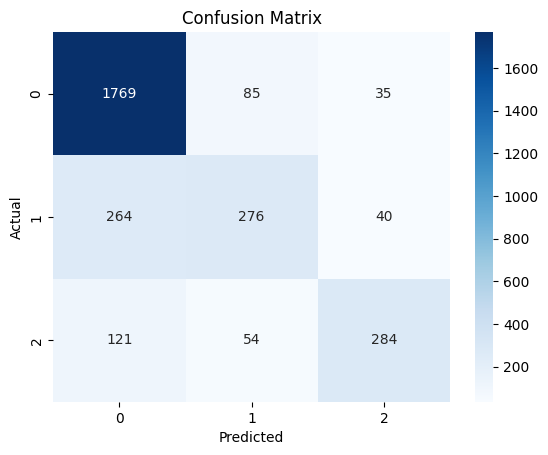

In [19]:
#EVALUATE THE MODEL
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [20]:
#SAMPLE PREDICTIONS

sample_df = df.sample(10)
sample_df['clean_text_vectorized'] = vectorizer.transform(sample_df['clean_text']).toarray().tolist()
sample_predictions = model.predict(vectorizer.transform(sample_df['clean_text']))
sample_df['Predicted Sentiment'] = sample_predictions
sample_df[['text', 'Predicted Sentiment']]


,text,Predicted Sentiment
4283,"@united + besides, no small degree of self-int...",negative
12630,@AmericanAir Is this a serious thread. Maybe y...,negative
2738,@united 2 days and 3 planes with mechanical is...,negative
192,@VirginAmerica you suck!,negative
5813,@SouthwestAir is seriously THE WORST. I don't ...,negative
5316,@SouthwestAir 2nd leg of trip Cancelled Flight...,negative
1017,@united Can't leave the Tarmac ..united's gate...,negative
1338,"@united basically, I need to leave from Hawaii...",negative
7387,@JetBlue Why are you making it so freaking har...,negative
354,@VirginAmerica I am deeply disappointed that y...,negative


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

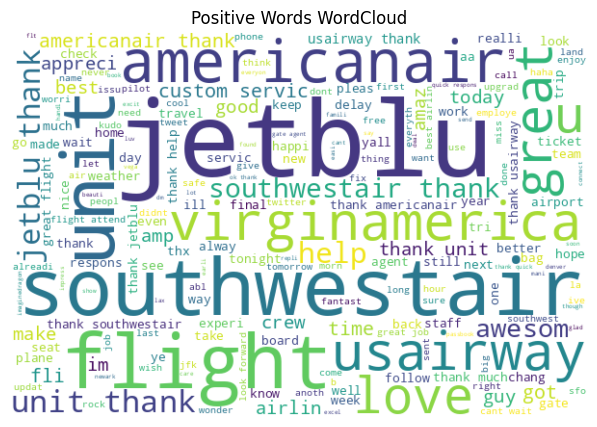

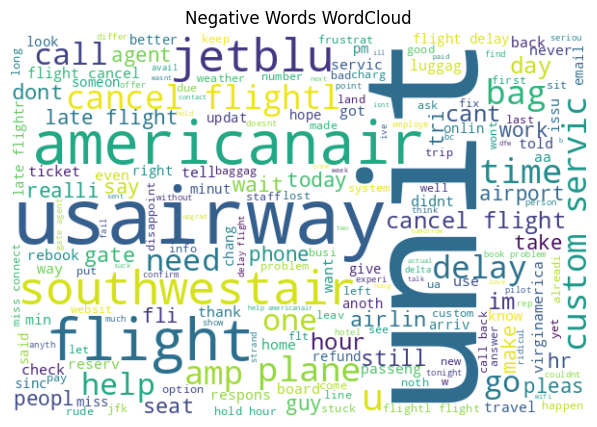

In [21]:
# WordClouds for Positive & Negative
positive_text = ' '.join(df[df['airline_sentiment']=='positive']['clean_text'])
negative_text = ' '.join(df[df['airline_sentiment']=='negative']['clean_text'])

# Positive WordCloud
wordcloud_pos = WordCloud(width=600, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Words WordCloud")
plt.show()

# Negative WordCloud
wordcloud_neg = WordCloud(width=600, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Words WordCloud")
plt.show()
